In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error

In [150]:
data = pd.read_csv('laptop_price.csv',encoding='latin-1')

In [151]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [152]:
data.isnull().sum() # to cheack the null values

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [154]:
#we have to convert object values to numarical value s.first we concider ram and weight first we convert into string value and remove the characters then again it converts to integer value
data['Ram'] =data["Ram"].str.replace('GB','').astype('int32')
data['Weight'] =data["Weight"].str.replace('kg','').astype('float32')

In [155]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [156]:
# to see what features are influance the target variable(laptop price)
data.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

In [157]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [158]:
#wen we do one hot encording he receive 19 colum hence we reducr number of category 
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft' or inpt == 'Xiaomi' or inpt == 'Vero' or inpt == 'Chuwi' or inpt == 'Google' or inpt == 'Fujitsu' or inpt == 'LG' or inpt == 'Huawei' :
        return 'Other'
    else:
        return inpt
data['Company'] = data['Company'].apply(add_company)

In [159]:
data['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

In [160]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [161]:
#from this feathure we concider only whether thave touchscreen and IPS
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['IPS'] = data ["ScreenResolution"].apply(lambda x:1 if 'IPS' in x else 0)

In [162]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0


In [163]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [164]:
len(data['Cpu'].value_counts())

118

In [165]:
#add anothe colum which contain first tree word of cpu

data['cpu_name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [166]:
#now  concate some categorys
def set_processor(name):
    if name == 'Intel Core i7' or name =='Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0]=='AMD':
            return 'AMD'
        else:
            return 'Other'
        
data['cpu_name'] = data['cpu_name'].apply(set_processor)

In [167]:
data['cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: cpu_name, dtype: int64

In [168]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [169]:
len(data['Gpu'].value_counts())

110

In [170]:
#cread new column only cocedrtin first word of gpu
data['gpu_name']= data['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [171]:
data['gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_name, dtype: int64

In [172]:
#delete ARM row
data = data[data['gpu_name'] !="ARM"]

In [173]:
def set_os(inpt):
    if inpt == 'Windows 10' or inpt=='Windows 7' or inpt=='Windows 10 s':
        return 'Windows'
    elif inpt == 'macOS' or inpt == 'Mac OS x':
        return 'Mac'
    elif inpt == 'Linux':
        return inpt
    else:
        return 'other'
    
data['OpSys'] =data['OpSys'].apply(set_os)

C:\Users\DELL\AppData\Local\Temp/ipykernel_9212/4069601743.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OpSys'] =data['OpSys'].apply(set_os)


In [174]:
data['OpSys'].value_counts()

Windows    1117
other       110
Linux        62
Mac          13
Name: OpSys, dtype: int64

In [175]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,Intel Core i5,Intel


In [176]:
data=data.drop(['laptop_ID','Inches','Product','ScreenResolution','Cpu','Gpu'],axis=1)

In [177]:
data.head(2)

,Company,TypeName,Ram,Memory,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,Apple,Ultrabook,8,128GB SSD,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Mac,1.34,898.94,0,0,Intel Core i5,Intel


In [178]:
data=data.drop(['Memory'],axis=1)


In [179]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,Notebook,8,other,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,Intel Core i5,Intel


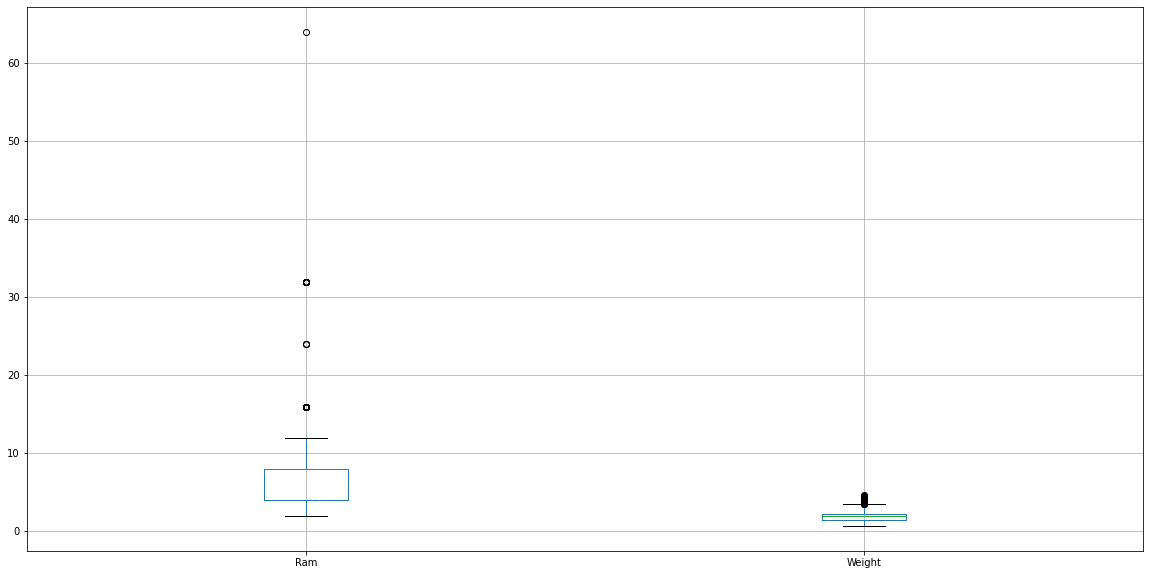

In [180]:
data_num=data[["Ram","Weight"]].boxplot()

In [189]:
#covert to numerical valus using one hot encording(add dummy variables)
data=pd.get_dummies(data)

In [190]:
data.head()

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Windows,OpSys_other,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,1339.69,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,898.94,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,575.00,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,16,1.83,2537.45,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,1803.60,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [191]:
X = data.drop(['Price_euros'],axis=1)

In [192]:
X

,Ram,Weight,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,...,OpSys_Windows,OpSys_other,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,16,1.83,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1299,16,1.30,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1300,2,1.50,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
1301,6,2.19,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [193]:
y = data['Price_euros']

In [194]:
y


0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1302, dtype: float64

In [196]:
X.head()

,Ram,Weight,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,...,OpSys_Windows,OpSys_other,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,16,1.83,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [197]:
from sklearn.model_selection import train_test_split

In [212]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [213]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [214]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','gini','squared_error'],
                'n_estimators': [50,100,150]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criter

,model,best_score,best_params
0,linear_regression,0.686605,{'normalize': False}
1,lasso,0.690401,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.703028,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random_forest,0.794199,"{'criterion': 'squared_error', 'n_estimators':..."


In [215]:
RF = RandomForestRegressor()
beast_model = RF.fit(X_train,y_train)

In [221]:
beast_model.score(X_train,y_train)

0.9579189075234396

In [ ]:
beast_model.predict()

In [222]:
y_pred = beast_model.predict(X_test)

In [223]:
y_pred

array([ 267.76866667, 1794.64543333, 2009.2087    ,  569.20111214,
       2161.62524   ,  550.53056667,  406.5485    ,  329.18276667,
        992.68587   , 2188.5609    , 1697.06389345,  751.4872    ,
        616.1417    , 1311.157     , 2890.78276167,  885.51569381,
        659.31895   , 1115.2953    , 2008.99586667, 1982.26055833,
        335.83885333, 1052.66843333,  596.70598333, 1367.02023333,
        767.33069667,  637.825025  ,  572.00298056,  599.47486667,
        796.829125  , 1220.5839    , 1182.995     ,  724.99826667,
       1416.89733333, 1002.88774167, 1890.50938833, 1121.71766667,
       1515.57033333,  511.04141667, 1232.2293    , 2475.87336667,
       1650.49252   , 1303.3534    , 4645.60883333, 1005.48208333,
       1255.46922619,  484.32660476, 1280.19988683,  656.2823    ,
       1350.88666667,  358.2971    ,  779.85616667, 2343.9628    ,
        610.98605   , 1057.01965   ,  751.7232    , 1185.11912857,
        343.78677302, 1127.6344    ,  587.34029833, 1823.40935

In [224]:
mean_squared_error(y_test,y_pred)

111274.31922885928

In [225]:
#now save the file
import pickle
with open('predictor.pickle','wb') as file:
    pickle.dump(beast_model,file)

In [226]:
#we wat to import all the colums we import that in to json file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [227]:
X.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Windows', 'OpSys_other',
       'cpu_name_AMD', 'cpu_name_Intel Core i3', 'cpu_name_Intel Core i5',
       'cpu_name_Intel Core i7', 'cpu_name_Other', 'gpu_name_AMD',
       'gpu_name_Intel', 'gpu_name_Nvidia'],
      dtype='object')